In [89]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [93]:
from sklearn import tree
import sys
import matplotlib.pyplot as plt
def pso(particles,iterations,dimensions,inertia):
  max_d=40
  min_d=10
  max_f=1e-5
  min_f=1e-8
  max_id=1e-4
  min_id=1e-1
  max_l=0.5
  min_l=0.1
  x=np.random.rand(particles,1)*(max_d - min_d)+min_d
  y=np.random.rand(particles,1)*(max_f - min_f)+min_f
  z=np.random.rand(particles,1)*(max_id - min_id)+min_id
  q=np.random.rand(particles,1)*(max_l - min_l)+min_l
  c=np.concatenate((x,y,z,q),axis=1)
  v=np.zeros((particles,dimensions))
  c1=2
  c2=2
  p_best=np.zeros((particles,dimensions))
  p_best_val=np.zeros(particles)+sys.maxsize
  g_best=np.zeros(dimensions)
  g_best_val=sys.maxsize
  best_iter=np.zeros(iterations)
  p_best_RGS=np.empty((particles),dtype=object)
  g_best_RGS=sys.maxsize
  #plot(c)
  from sklearn.metrics import mean_squared_error
  for i in range(iterations):
    for j in range(particles):
      rgs=tree.DecisionTreeClassifier(max_depth=c[j][0],max_features=c[j][1],min_impurity_decrease=c[j][2],
                                     min_samples_leaf=c[j][3])
      rgs.fit(x_train,y_train)
      y_predict=rgs.predict(x_test)
      mse=mean_squared_error(y_test,y_predict)

      if(mse<p_best_val[j]):
        p_best_val[j]=mse
        p_best_RGS[j]=rgs
        p_best[j]=c[j].copy()

      aux=np.argmin(p_best_val)
      if(p_best_val[aux] < g_best_val):
        g_best_val=p_best_val[aux]
        g_best=p_best[aux].copy()
        g_best_RGS=p_best_RGS[aux]

      rand1=np.random.random()
      rand2=np.random.random()

      w=inertia
      
      v[j]=w*v[j]+c1*(p_best[j]-c[j])*rand1+c2*(g_best-c[j])*rand2
      c[j]=c[j]+v[j]

      if(c[j][3] <min_l):
        c[j][3]=min_l
      if(c[j][3] >max_l):
        c[j][3]=max_l
      if(c[j][2] <min_id):
        c[j][2]=min_id
      if(c[j][2] >max_id):
        c[j][2]=max_id
      if(c[j][1]<min_f):
        c[j][1]=min_f
      if(c[j][1]>max_f):
        c[j][1]=max_f
      if(c[j][0]<min_d):
        c[j][0]=min_d
      if(c[j][0]>max_d):
        c[j][0]=max_d
      
    best_iter[i]=g_best_val

    print('best value iteration %d = %f\n' %(i,g_best_val))

  print('group best configuration found')
  print(g_best)
  print('\n')
  print('best classifier \n')
  print(g_best_RGS)
  print('\n')

  t=range(iterations)
  plt.plot(t,best_iter,label='Fitness Value')
  plt.legend()
  plt.show()
  #plot(c)

  predict_test=g_best_RGS.predict(x_test)
  #print(color.BOLD + "predictions with the population best value found:\n" + color.END)
  evaluate(predict_test)

In [94]:
def evaluate(predictions):
  from sklearn.metrics import accuracy_score
  import statistics as st
  predict_test=predictions

  plt.plot(range(len(y_test)),y_test,label='Real')
  plt.plot(range(len(predict_test)),predict_test,label='Predicted')
  plt.legend()
  plt.show()
  
  mse=accuracy_score(y_test,predict_test)
  print("\n")
  print("Accuracy: \t %f "%mse)
  print("\n")
  print('prediction average: \t %f'%((predict_test.sum()/len(predict_test))))
  print("\n")
  print('prediction median:\t %f' %(st.median(predict_test)))

best value iteration 0 = 0.181818

best value iteration 1 = 0.181818

best value iteration 2 = 0.181818

best value iteration 3 = 0.181818

best value iteration 4 = 0.181818

best value iteration 5 = 0.181818

best value iteration 6 = 0.181818

best value iteration 7 = 0.181818

best value iteration 8 = 0.181818

best value iteration 9 = 0.181818

best value iteration 10 = 0.181818

best value iteration 11 = 0.181818

best value iteration 12 = 0.181818

best value iteration 13 = 0.181818

best value iteration 14 = 0.181818

best value iteration 15 = 0.181818

best value iteration 16 = 0.168831

best value iteration 17 = 0.168831

best value iteration 18 = 0.168831

best value iteration 19 = 0.168831

group best configuration found
[1.64455070e+01 7.68693927e-06 1.00000000e-04 1.80893762e-01]


best classifier 

DecisionTreeClassifier(max_depth=16.44550703729642,
                       max_features=7.686939269961949e-06,
                       min_impurity_decrease=0.0001,
             

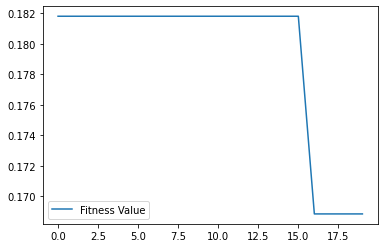

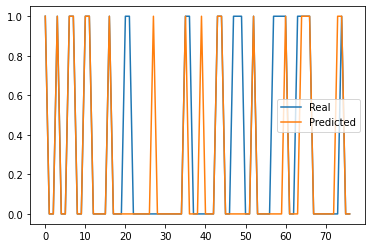



Accuracy: 	 0.831169 


prediction average: 	 0.246753


prediction median:	 0.000000


In [95]:
pso(120,20,4,1)

In [96]:
classifier=tree.DecisionTreeClassifier(max_depth=16.44550703729642,
                       max_features=7.686939269961949e-06,
                       min_impurity_decrease=0.0001,
                       min_samples_leaf=0.18089376176646899)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=16.44550703729642,
                       max_features=7.686939269961949e-06,
                       min_impurity_decrease=0.0001,
                       min_samples_leaf=0.18089376176646899)

In [97]:
prediction=classifier.predict(x_test)

In [98]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,prediction)
accuracy

0.8181818181818182

In [99]:
input=(5,166,72,19,175,22.9,0.56,51)
input_as_numpy=np.asarray(input)
input_reshape=input_as_numpy.reshape(1,-1)
prediction=classifier.predict(input_reshape)
print(prediction)
if (prediction[0] == 0):
  print(" Patient has no diabetes")
else:
  print(" Patient has diabetes")

[1]
 Patient has diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [100]:
import pickle
filename='trained_model.sav'
pickle.dump(classifier,open('trained_model.sav','wb'))

In [101]:
load_model=pickle.load(open('trained_model.sav','rb'))


In [102]:
input=(5,166,72,19,175,22.9,0.56,51)
input_as_numpy=np.asarray(input)
input_reshape=input_as_numpy.reshape(1,-1)
prediction=load_model.predict(input_reshape)
print(prediction)
if (prediction[0] == 0):
  print(" Patient has no diabetes")
else:
  print(" Patient has diabetes")

[1]
 Patient has diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
